In [2]:
from sklearn.datasets import make_classification

In [3]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd 

In [4]:
X, Y = make_classification(n_samples=400, n_classes=2, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

In [5]:
X.shape, Y.shape

((400, 2), (400,))

In [6]:
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

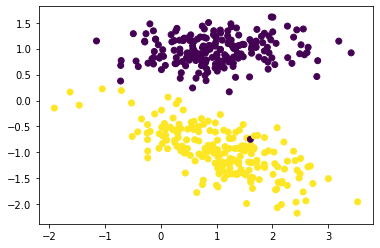

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [8]:
class SVM:
    def __init__(self, c = 1.0):
        self.c = c
        self.W = 0 
        self.b = 0

    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        loss += 0.5*(np.dot(W.T, W))

        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            loss += self.c*max(0, 1-ti)

        return loss[0][0]

    def fit(self, X, Y, batch_size=20, learning_rate=0.001, max_itr=100):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]

        n = learning_rate
        c = self.c

        #Initialize the W and b
        W = np.zeros((1, no_of_features))
        b = 0

        print(self.hingeLoss(W, b, X, Y))

        #Training from here
        losses = []

        for i in range(max_itr):
            l = self.hingeLoss(W, b, X, Y)
            losses.append(l)

            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            for batch_start in range(0, no_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W, X[i].T) + b)

                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                W = W - n*W + n*gradw
                b = b + n*gradb

        self.W = W
        self.b = b
        return W, b, losses

In [9]:
mySVM = SVM()

In [10]:
W, b, losses = mySVM.fit(X, Y, learning_rate=0.01)
print(losses[0], losses[-1])

400.0
400.0 21.3235207133637


In [11]:
W, b, losses = mySVM.fit(X, Y, learning_rate=1)
print(losses[0], losses[-1])

400.0
400.0 941.281088879513


In [26]:
W, b, losses = mySVM.fit(X, Y, learning_rate=0.1)
print(losses[0], losses[-1])

400.0
400.0 50.41112992759757


In [13]:
W, b, losses = mySVM.fit(X, Y, learning_rate=0.0001)
print(losses[0], losses[-1])

400.0
400.0 32.47620870098848


In [14]:
W, b, losses = mySVM.fit(X, Y)
print(losses[0], losses[-1])

400.0
400.0 21.398847914259225


In [22]:
W, b, losses = mySVM.fit(X, Y, learning_rate=0.000001)
print(losses[0], losses[-1])

400.0
400.0 385.2170310763124


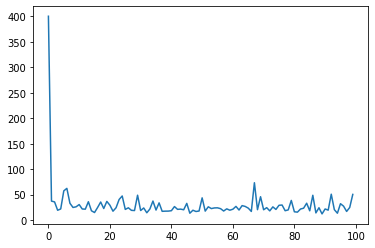

In [27]:
plt.plot(losses)
plt.show()

In [28]:
W, b, losses = mySVM.fit(X, Y)
print(losses[0], losses[-1])

400.0
400.0 21.47189587979562


In [35]:
mySVMc2 = SVM(2.0)

In [36]:
W, b, losses = mySVM.fit(X, Y)
print(losses[0], losses[-1])

400.0
400.0 21.496249880627264


In [37]:
def pltHyperPlane(w1, w2, b):
    plt.figure(figsize=(12, 12))

    x_1 = np.linspace(-2, 4, 10)
    x_2 = - (w1*x_1 + b)/w2

    x_p = - (w1*x_1 + b + 1)/w2
    x_n = - (w1*x_1 + b - 1)/w2
    
    plt.plot(x_1, x_2)
    plt.plot(x_1, x_p)
    plt.plot(x_1, x_n)
    plt.scatter(X[:, 0], X[:, 1], c = Y)
    plt.show()

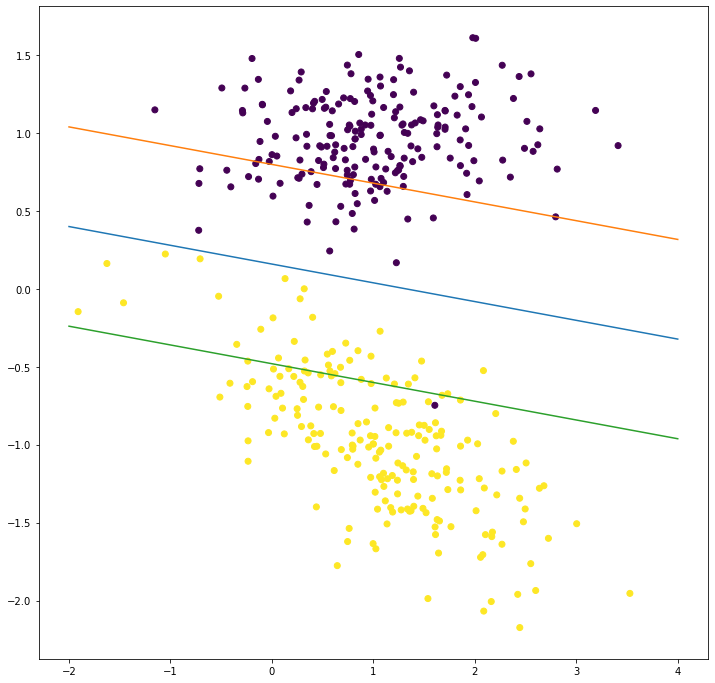

In [38]:
pltHyperPlane(W[0][0], W[0][1], b)

In [20]:
W

array([[-0.18993672, -1.56548468]])

In [47]:
mySVMc10 = SVM(c = 1000.0)
W, b, losses = mySVMc10.fit(X, Y)
print(losses[0], losses[-1])

400000.0
400000.0 11295.160407293817


In [48]:
W

array([[ -1.69810615, -10.78427806]])

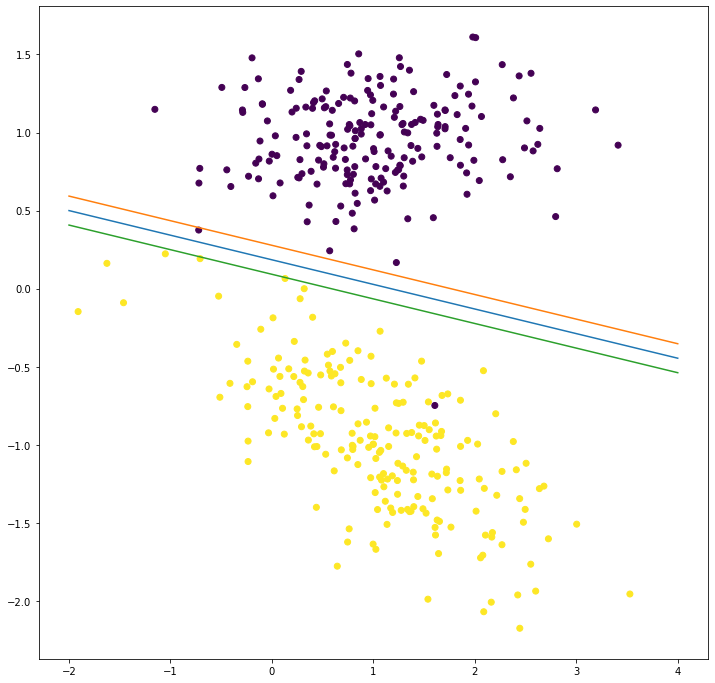

In [49]:
pltHyperPlane(W[0][0], W[0][1], b)